# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [23]:
weather_df = pd.DataFrame()
weather_df["City"] = ""
weather_df['Country'] = ""
weather_df['Lat'] = ""
weather_df["Lng"] = ""

In [24]:
weather_df

,City,Country,Lat,Lng


In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [26]:
cities

['kruisfontein',
 'butaritari',
 'ghanzi',
 'avarua',
 'punta arenas',
 'yelizovo',
 'rikitea',
 'tilichiki',
 'east london',
 'manokwari',
 'severo-kurilsk',
 'mys shmidta',
 'cape town',
 'gualeguay',
 'nizhneyansk',
 'port lincoln',
 'mataura',
 'grand-santi',
 'puerto ayora',
 'deming',
 'kazalinsk',
 'hurricane',
 'hithadhoo',
 'najran',
 'new norfolk',
 'saint george',
 'djibo',
 'batagay',
 'upernavik',
 'qaanaaq',
 'hobart',
 'bluff',
 'eyl',
 'kapaa',
 'mackay',
 'college',
 'tiksi',
 'mar del plata',
 'ushuaia',
 'sao filipe',
 'okhotsk',
 'saleaula',
 'carnarvon',
 'el perico',
 'salina',
 'kozhva',
 'saskylakh',
 'irati',
 'busselton',
 'verkhoyansk',
 'pevek',
 'vaini',
 'presidencia roque saenz pena',
 'vite',
 'murray bridge',
 'thompson',
 'leningradskiy',
 'coos bay',
 'norfolk',
 'atuona',
 'dikson',
 'illoqqortoormiut',
 'nome',
 'barra do garcas',
 'narsaq',
 'chimore',
 'port alfred',
 'vardo',
 'tateyama',
 'aurillac',
 'khatanga',
 'saldanha',
 'carballo',
 'kyra

In [32]:
weather_df = pd.DataFrame(cities)

In [39]:
weather_df.head()

,0
0,kruisfontein
1,butaritari
2,ghanzi
3,avarua
4,punta arenas


In [47]:
weather_df.columns=["City"]

In [48]:
weather_df.head()

,City
0,kruisfontein
1,butaritari
2,ghanzi
3,avarua
4,punta arenas


In [49]:
weather_df["Country"]=""
weather_df["Lat"]=""
weather_df["Lng"]=""
weather_df["Date"]=""
weather_df["Cloudiness"]=""
weather_df["Humidity"]=""
weather_df["Max Temp"]=""
weather_df["Wind Speed"]=""


In [50]:
weather_df.head()

,City,Country,Lat,Lng,Date,Cloudiness,Humidity,Max Temp,Wind Speed
0,kruisfontein,,,,,,,,
1,butaritari,,,,,,,,
2,ghanzi,,,,,,,,
3,avarua,,,,,,,,
4,punta arenas,,,,,,,,


In [66]:
response['clouds']['all']

40

In [71]:
#pull cities, get lat long again
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

for index, row in weather_df.iterrows():
    city_name = row["City"]
    print(f"Retrieving Results for Index {index}: {city_name}.")
    response = requests.get(query_url + city_name).json()
      
    try:
    
        weather_df.set_value(index, "Country", response['sys']['country'])
        weather_df.set_value(index, "Lat", response['coord']['lat'])
        weather_df.set_value(index, "Lng", response['coord']['lon'])
        weather_df.set_value(index, "Date", response['dt'])
        weather_df.set_value(index, "Cloudiness", response['clouds']['all'])
        weather_df.set_value(index, "Humidity", response['main']['humidity'])
        weather_df.set_value(index, "Max Temp", response['main']['temp_max'])
        weather_df.set_value(index, "Wind Speed", response['wind']['speed'])
    
    except Exception as e:
        print(e)
        print("Missing data... skipping!")



Retrieving Results for Index 0: kruisfontein.


C:\Users\chamb\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
C:\Users\chamb\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\chamb\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\chamb\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\chamb\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:

Retrieving Results for Index 1: butaritari.
Retrieving Results for Index 2: ghanzi.
Retrieving Results for Index 3: avarua.
Retrieving Results for Index 4: punta arenas.
Retrieving Results for Index 5: yelizovo.
Retrieving Results for Index 6: rikitea.
Retrieving Results for Index 7: tilichiki.
Retrieving Results for Index 8: east london.
Retrieving Results for Index 9: manokwari.
Retrieving Results for Index 10: severo-kurilsk.
Retrieving Results for Index 11: mys shmidta.
'sys'
Missing data... skipping!
Retrieving Results for Index 12: cape town.
Retrieving Results for Index 13: gualeguay.
Retrieving Results for Index 14: nizhneyansk.
'sys'
Missing data... skipping!
Retrieving Results for Index 15: port lincoln.
Retrieving Results for Index 16: mataura.
Retrieving Results for Index 17: grand-santi.
Retrieving Results for Index 18: puerto ayora.
Retrieving Results for Index 19: deming.
Retrieving Results for Index 20: kazalinsk.
'sys'
Missing data... skipping!
Retrieving Results for I

Retrieving Results for Index 176: comodoro rivadavia.
Retrieving Results for Index 177: khani.
Retrieving Results for Index 178: sinnamary.
Retrieving Results for Index 179: artesia.
Retrieving Results for Index 180: westport.
Retrieving Results for Index 181: tromso.
Retrieving Results for Index 182: kihei.
Retrieving Results for Index 183: sidi ali.
Retrieving Results for Index 184: aklavik.
Retrieving Results for Index 185: ponta do sol.
Retrieving Results for Index 186: salalah.
Retrieving Results for Index 187: tarudant.
'sys'
Missing data... skipping!
Retrieving Results for Index 188: bethel.
Retrieving Results for Index 189: taolanaro.
'sys'
Missing data... skipping!
Retrieving Results for Index 190: beroroha.
Retrieving Results for Index 191: dekar.
Retrieving Results for Index 192: oxapampa.
Retrieving Results for Index 193: bandarbeyla.
Retrieving Results for Index 194: cabedelo.
Retrieving Results for Index 195: asyut.
Retrieving Results for Index 196: rawson.
Retrieving Res

Retrieving Results for Index 350: iskateley.
Retrieving Results for Index 351: chimbote.
Retrieving Results for Index 352: esperance.
Retrieving Results for Index 353: solnechnyy.
Retrieving Results for Index 354: janakpur.
Retrieving Results for Index 355: fairbanks.
Retrieving Results for Index 356: santa rosa.
Retrieving Results for Index 357: bundoran.
Retrieving Results for Index 358: sulangan.
Retrieving Results for Index 359: penzance.
Retrieving Results for Index 360: bayamo.
Retrieving Results for Index 361: inta.
Retrieving Results for Index 362: kasempa.
Retrieving Results for Index 363: kirakira.
Retrieving Results for Index 364: rusape.
Retrieving Results for Index 365: benjamin constant.
Retrieving Results for Index 366: mastic beach.
Retrieving Results for Index 367: galesong.
Retrieving Results for Index 368: mahaicony.
'sys'
Missing data... skipping!
Retrieving Results for Index 369: rio gallegos.
Retrieving Results for Index 370: port hardy.
Retrieving Results for Ind

Retrieving Results for Index 525: uruana.
Retrieving Results for Index 526: zhangye.
Retrieving Results for Index 527: atbasar.
Retrieving Results for Index 528: lac du bonnet.
Retrieving Results for Index 529: codrington.
Retrieving Results for Index 530: manggar.
Retrieving Results for Index 531: yatou.
Retrieving Results for Index 532: beibei.
Retrieving Results for Index 533: wanning.
Retrieving Results for Index 534: deputatskiy.
Retrieving Results for Index 535: lolua.
'sys'
Missing data... skipping!
Retrieving Results for Index 536: namatanai.
Retrieving Results for Index 537: chernogorsk.
Retrieving Results for Index 538: laguna.
Retrieving Results for Index 539: fevralsk.
'sys'
Missing data... skipping!
Retrieving Results for Index 540: ampanihy.
Retrieving Results for Index 541: moletai.
Retrieving Results for Index 542: sao felix do xingu.
Retrieving Results for Index 543: nikolayevsk-na-amure.
Retrieving Results for Index 544: sorland.
Retrieving Results for Index 545: melv

In [8]:
# # Save config information.
# url = "http://api.openweathermap.org/data/2.5/weather?"
# units = "imperial"

# # Build partial query URL
# query_url = f"{url}appid={api_key}&units={units}&q="

In [72]:
weather_df.head()

,City,Country,Lat,Lng,Date,Cloudiness,Humidity,Max Temp,Wind Speed,County
0,kruisfontein,ZA,-34.00,24.73,1551562508,24,85,63.44,2.15,GQ
1,butaritari,KI,3.07,172.79,1551562509,76,100,82.34,13.22,GQ
2,ghanzi,BW,-21.70,21.65,1551562509,32,24,76.09,7.52,GQ
3,avarua,CK,-21.21,-159.78,1551560400,0,79,84.20,5.82,GQ
4,punta arenas,CL,-53.16,-70.91,1551562391,40,76,55.40,9.17,GQ


In [74]:
weather_df = weather_df.drop(columns="County")

In [75]:
weather_df.head()

,City,Country,Lat,Lng,Date,Cloudiness,Humidity,Max Temp,Wind Speed
0,kruisfontein,ZA,-34.00,24.73,1551562508,24,85,63.44,2.15
1,butaritari,KI,3.07,172.79,1551562509,76,100,82.34,13.22
2,ghanzi,BW,-21.70,21.65,1551562509,32,24,76.09,7.52
3,avarua,CK,-21.21,-159.78,1551560400,0,79,84.20,5.82
4,punta arenas,CL,-53.16,-70.91,1551562391,40,76,55.40,9.17


In [54]:
pprint(response)

{'base': 'stations',
 'clouds': {'all': 24},
 'cod': 200,
 'coord': {'lat': 1.58, 'lon': 9.62},
 'dt': 1551548678,
 'id': 2308278,
 'main': {'grnd_level': 992.26,
          'humidity': 95,
          'pressure': 1010.9,
          'sea_level': 1010.9,
          'temp': 81.25,
          'temp_max': 81.25,
          'temp_min': 81.25},
 'name': 'Mbini',
 'sys': {'country': 'GQ',
         'message': 0.0032,
         'sunrise': 1551504661,
         'sunset': 1551548165},
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 214.004, 'speed': 9.44}}


In [78]:
from datetime import datetime

In [53]:
from pprint import pprint

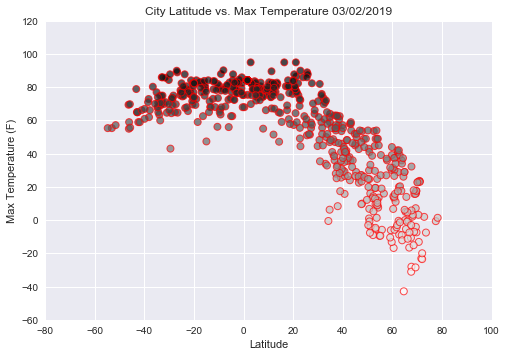

In [86]:
#Latitude v Temperature plot
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], c = weather_df["Max Temp"], edgecolor="red", linewidths=1, marker="o", 
            alpha=0.7, label="City")

#plt.style.use('seaborn')
plt.title(f"Max Temperature (F) vs. Latitude {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-60, 120])

# Save the figure
#plt.savefig("Latitude_v_Temperature.png")

# Show plot
plt.show()

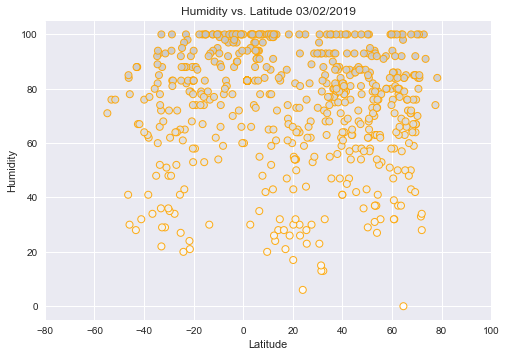

In [90]:
#Humidity v Latitude plot
plt.scatter(weather_df["Lat"], weather_df["Humidity"], c = weather_df["Humidity"], edgecolor="orange", linewidths=1, marker="o", 
            alpha=0.9, label="City")

#plt.style.use('seaborn')
plt.title(f"Humidity vs. Latitude {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-5, 105])

# Save the figure
#plt.savefig("Humidity_v_Temperature.png")

# Show plot
plt.show()

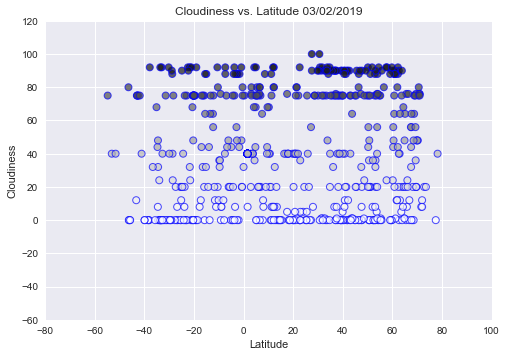

In [91]:
#Cloudiness v Temperature plot
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], c = weather_df["Cloudiness"], edgecolor="blue", linewidths=1, marker="o", 
            alpha=0.7, label="City")

#plt.style.use('seaborn')
plt.title(f"Cloudiness vs. Latitude {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-60, 120])

# Save the figure
#plt.savefig("Latitude_v_Temperature.png")

# Show plot
plt.show()

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

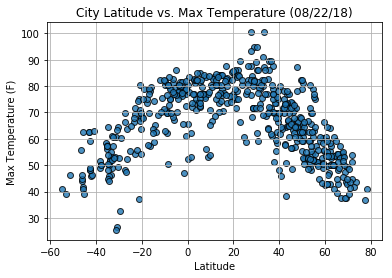

#### Latitude vs. Humidity Plot

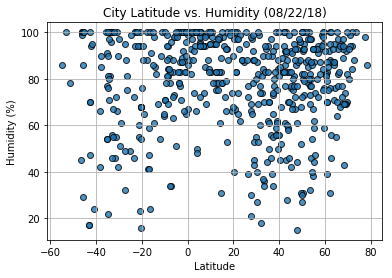

#### Latitude vs. Cloudiness Plot

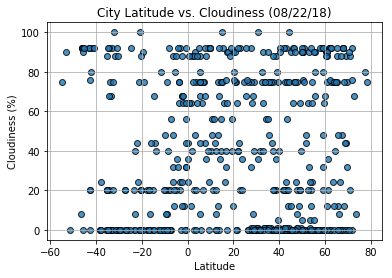

#### Latitude vs. Wind Speed Plot

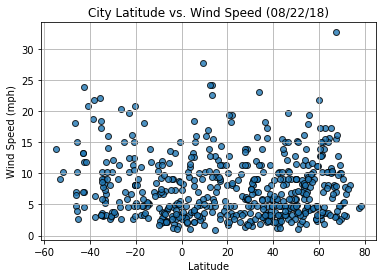